In [1]:
from my_functions import*

In [2]:

file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

In [3]:
"""
Zero Bias and Z mumu comparison using different delta r 
"""

"""
OFFLINE MUON PLOTS
"""

"""""""""""""""""""""""""""""""""
DIFFERENT DELTA R LIMITS - CHANGING LOWER AND UPPER LIMITS
"""""""""""""""""""""""""""""""""

#Assign eta and phi variables Zmumu
Z_mumu_eta=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)
Z_mumu_phi=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)

#Choose the number of events to plot
Z_mumu_nmin1=0
Z_mumu_nmax1=250

#Check how many events are not empty
Z_mumu_non_empty_count = ak.sum(ak.num(Z_mumu_eta[Z_mumu_nmin1:Z_mumu_nmax1]) > 0)

#Assign eta and phi variables Zero Bias
ZeroBias_eta=MuonTree_ZeroBias["muon_eta"].array()
ZeroBias_phi=MuonTree_ZeroBias["muon_phi"].array()

#Choose the number of events to plot
ZeroBias_nmin1=0
ZeroBias_nmax1=2500

#Check how many events are not empty
ZeroBias_non_empty_count = ak.sum(ak.num(ZeroBias_eta[ZeroBias_nmin1:ZeroBias_nmax1]) > 0)
#Set upper and lower limits
lower_dr1=0
upper_dr1=0.4



Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected


In [4]:
"""
I define this functions to plot everything more comfortably and as subplots
"""

def f(lower_dr,upper_dr,ax):
    #This line is used to set the axis to the current axis
    plt.sca(ax)

    #Compute the isolation and prepare it for plotting 
    Z_mumu_res=muon_isolation_all_events(MuonTree_ZeroBias,Z_mumu_eta,Z_mumu_phi,lower_dr,upper_dr,[Z_mumu_nmin1,Z_mumu_nmax1],100)
    Z_mumu_data=ak.flatten(Z_mumu_res)

    ZeroBias_res=muon_isolation_all_events(MuonTree_ZeroBias,ZeroBias_eta,ZeroBias_phi,lower_dr,upper_dr,[ZeroBias_nmin1,ZeroBias_nmax1],1000)
    ZeroBias_data=ak.flatten(ZeroBias_res)

    #Set the colors and labels for the plot
    colors=["#0072B2", "#FD0000"]
    labels=[fr"Z $\longrightarrow \mu \mu$ (Q=0), events={Z_mumu_non_empty_count}",
            fr"Zero Bias, events={ZeroBias_non_empty_count}"]

    #Plot the data
    coolplot([Z_mumu_data,ZeroBias_data],
                np.linspace(0,30000,20),
                colors,labels,
                "Isolation (MeV)","Counts",
            fr"$\Delta R$= [{np.round(lower_dr,2)},{np.round(upper_dr,2)}]",
              plot_show=False)

def f_subplots(lower_dr_arr,upper_dr_arr):
    # Plot as subplots
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    
    ax=ax.flatten()
    #for each lower and upper limit, plot the data
    for i in range(len(lower_dr_arr)):
        f(lower_dr_arr[i],upper_dr_arr[i],ax[i])

    fig.suptitle(r"Comparison of different $\Delta R$ upper limits - Offline data", fontsize=16)  # Set the global title
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to leave space for suptitle
    plt.show()

100%|██████████| 3/3 [00:26<00:00,  8.74s/it]


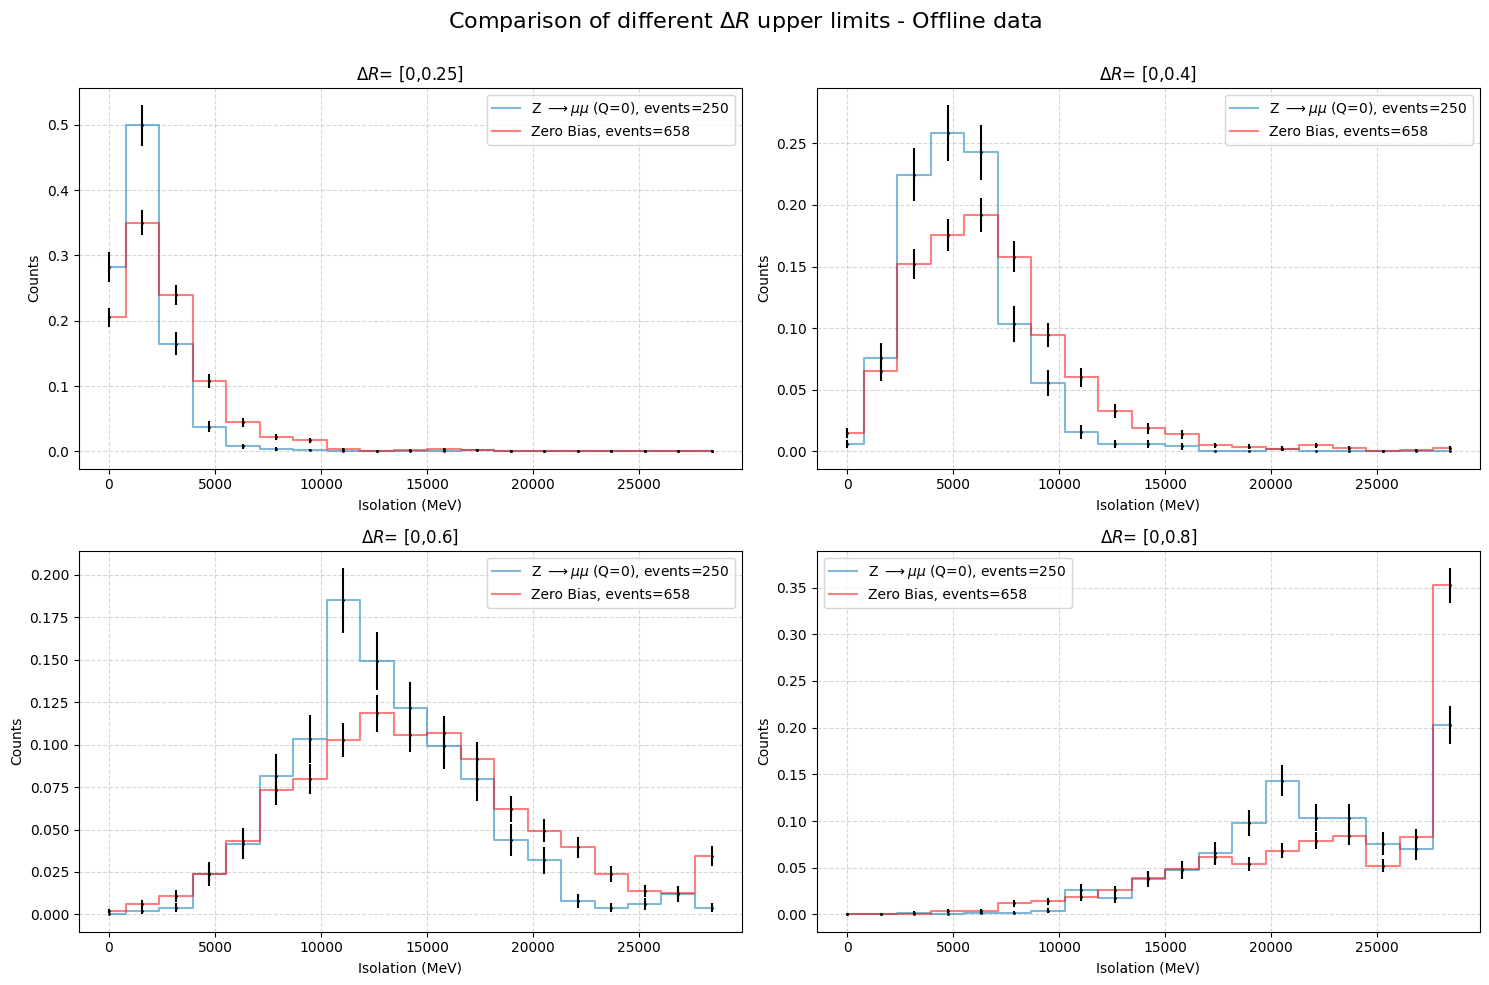

In [5]:
low_dr_arr=[0,0,0,0]
upper_dr_arr=[0.25,0.4,0.6,0.8]

f_subplots(low_dr_arr,upper_dr_arr)

100%|██████████| 3/3 [00:28<00:00,  9.44s/it]


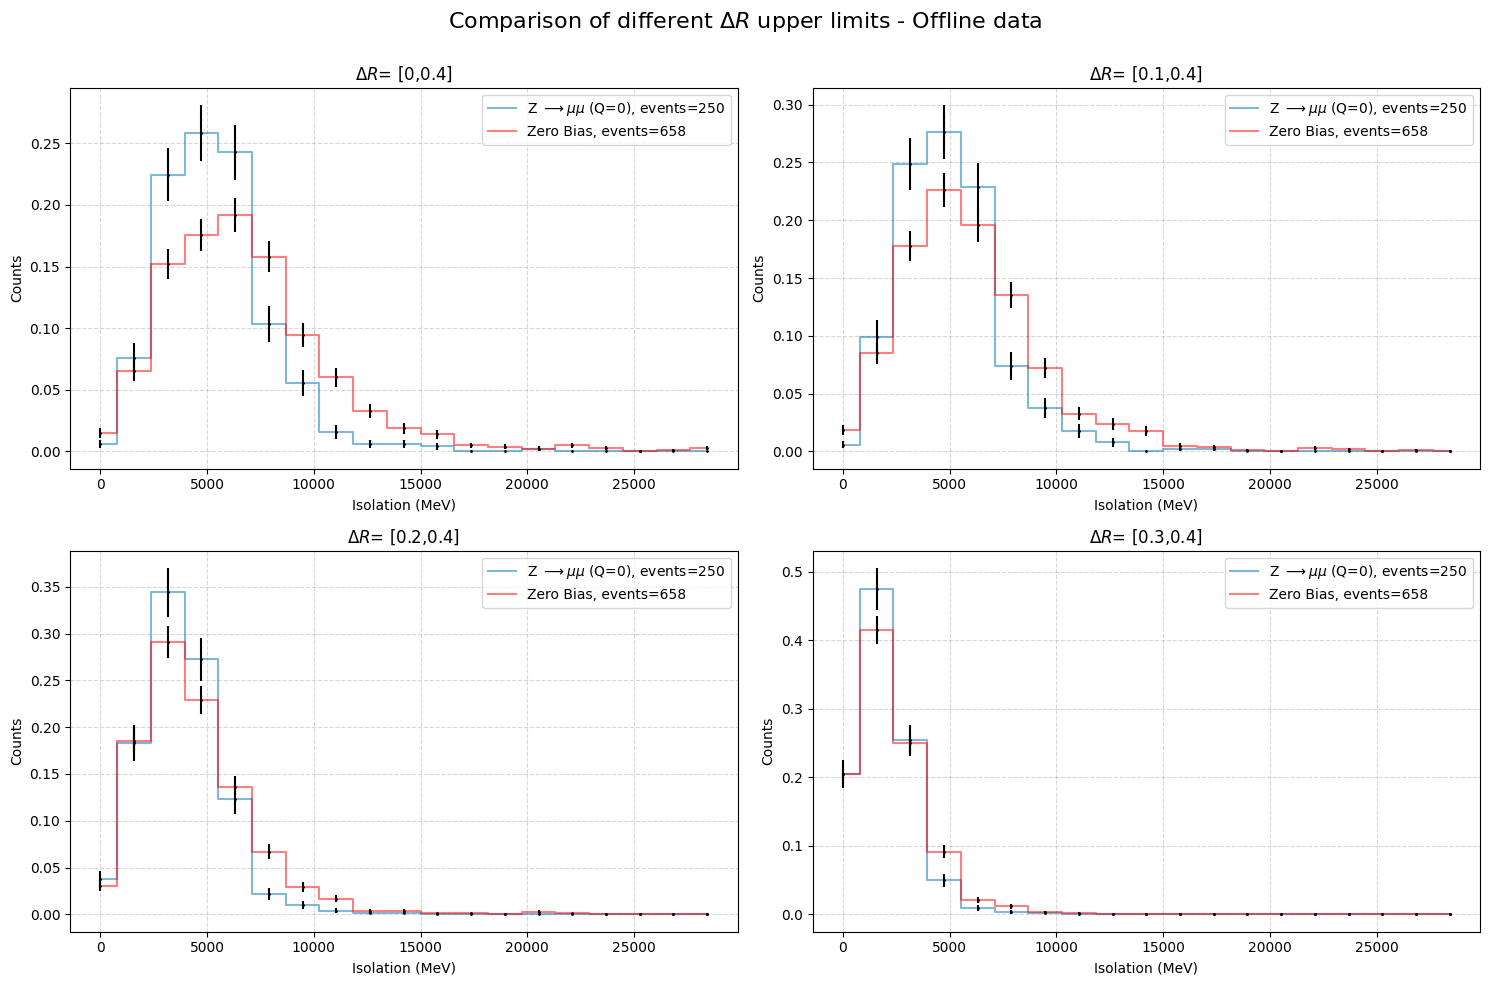

In [6]:
low_dr_arr=[0,0.1,0.2,0.3]
upper_dr_arr=[0.4,0.4,0.4,0.4]

f_subplots(low_dr_arr,upper_dr_arr)

100%|██████████| 3/3 [00:26<00:00,  9.00s/it]


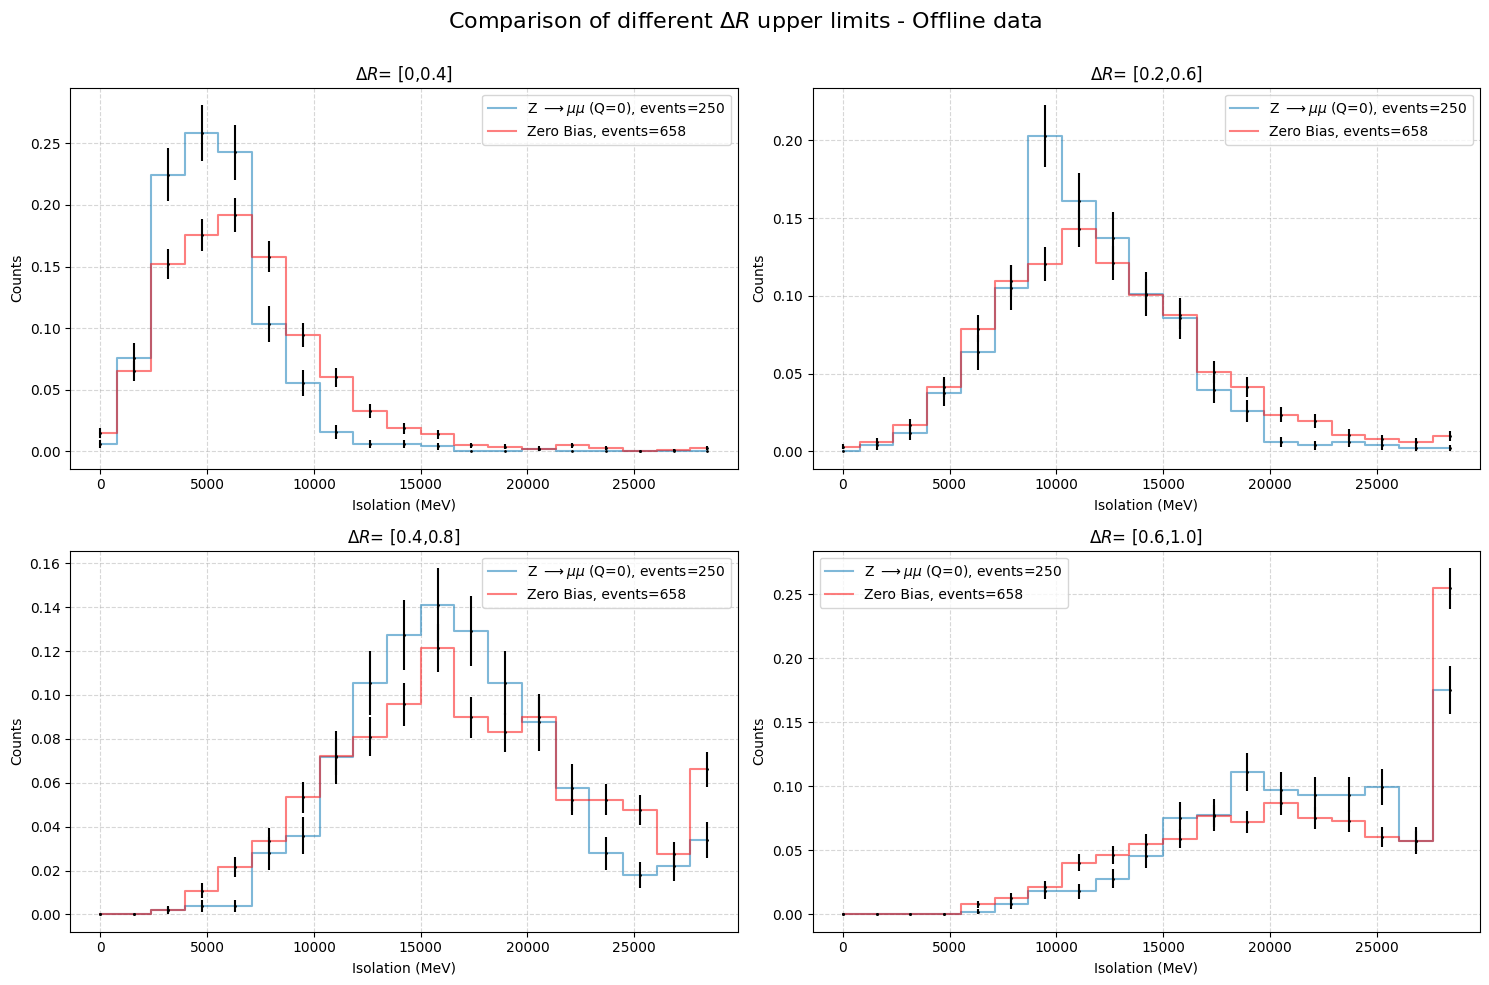

In [7]:
low_dr_arr=[0,0.2,0.4,0.6]
upper_dr_arr=[0.4,0.6,0.8,1.0]

f_subplots(low_dr_arr,upper_dr_arr)